## Moment curvature example of a T-shaped section

In [1]:
import opseestools.utilidades as ut 
import opseestools.analisis as an 
from openseespy.opensees import *
import opsvis as opsv
import matplotlib.pyplot as plt
import numpy as np

wipe() 
model('basic','-ndm',2,'-ndf',3)

#### Define materials

In [ ]:
fc = 28 # fc 
fy = 420 # fy 
noconf,conf,acero = ut.col_materials(fc,fy,'DES',tension='no',conftag=1,unctag=2,steeltag=3)

mallas = 4
p1=509.10*1000
p2=691.50*1000
p3=734.44*1000
p4 = p1*0.02
e1=0.00248
e2=0.005
e3=0.012
e4 = 0.015
pinchX=0.34
pinchY= 0.56
damage1= 0.038
damage2= 0.07
beta= 0.086

# ops.uniaxialMaterial('Hysteretic', mallas, p1, e1, p2, e2, p3, e3, -p1, -e1, -p2, -e2, -p3, -e3, pinchX, pinchY, damage1, damage2, beta)
uniaxialMaterial('HystereticSM', mallas, '-posEnv' ,p1, e1, p2, e2, p3, e3, p4, e4, '-negEnv', -p1, -e1, -p2, -e2, -p3, -e3, -p4, -e4)

#### Define T-shaped section

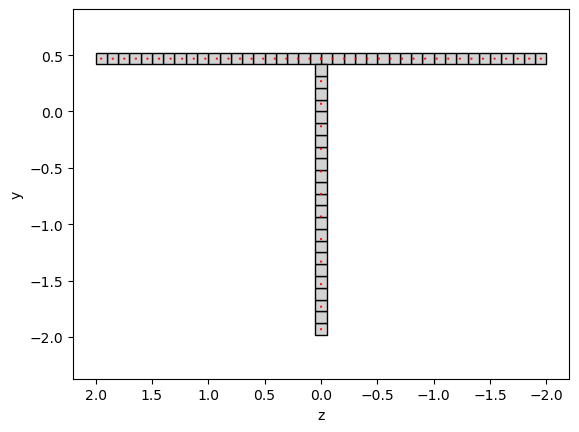

In [3]:
c = 0.05  # cover 
bf = 4.0  # ancho de la aleta/flange width
tf = 0.1  # espesor de la aleta/flange thickness
Ht = 2.5  # altura total de la sección/Section height
h1 = Ht - tf
tw = 0.1  # web thickness
yhat = ((bf*tf*tf/2)+(h1*tw*(h1/2+tf)))/(bf*tf+h1*tw) # centroid


nFibZw = int(tw/0.1)
nFibZf = int(bf/0.1)
nFibYw = int(h1/0.1)
nFibYf = int(tf/0.1)

# Bar areas
As4 = 0.000127
As5 = 0.0002
As7 = 0.000387
Asfi7 = np.pi*(0.7/100)**2/4

secT = 1 # tag de la sección a crear

# Se empleará la librería de opsvis que permite visualizar la sección
s30x30 = [['section', 'Fiber', secT, '-GJ', 1.0e6],
             # ['patch', 'rect', conf, nFibCore, nFibZcore, c-y1col, c-z1col, y1col-c, z1col-c],
             ['patch', 'rect', noconf, nFibYf, nFibZf, yhat-tf, -bf/2, yhat, bf/2],
             ['patch', 'rect', noconf, nFibYw, nFibZw, -Ht+yhat, -tw/2, yhat-tf, tw/2],
             ['layer', 'straight', mallas, int((bf-2*c)/0.1), Asfi7, yhat-c, -bf/2+c, yhat-c, bf/2-c],
             ['layer', 'straight', mallas, 13, Asfi7, yhat-c, 0, -Ht+yhat+c, 0]]



matcolor = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']
# matcolor=['y', 'b', 'r', 'g', 'm', 'k', 'k', 'k']
#plt.figure()
opsv.plot_fiber_section(s30x30,matcolor=matcolor)
plt.axis('equal')
plt.show()


opsv.fib_sec_list_to_cmds(s30x30)
pint = 5 # puntos de integración
beamIntegration('Lobatto', secT, secT,pint) 

#### Calculate moment-cuvature

Momento:  414.2976179851068
curvatura:  0.004999999999999983


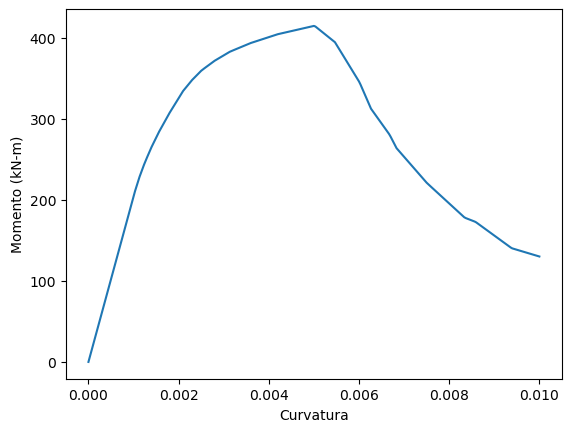

In [4]:
P = 0.0 # Carga axial/Axial load
phi_u = 0.01 # curvatura hasta la que se intentará llegar/target curvature
Mom,curv = ut.MomentCurvature(secT, P, phi_u)

print('Momento máx: ', np.max(np.abs(Mom)))
print('curvatura: ', curv[np.argmax(np.abs(Mom))])